C:\Users\sharo\AppData\Local\Temp\ipykernel_18804\3852418455.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\vcu extra\\assignment\\data\\NSSO68.csv")


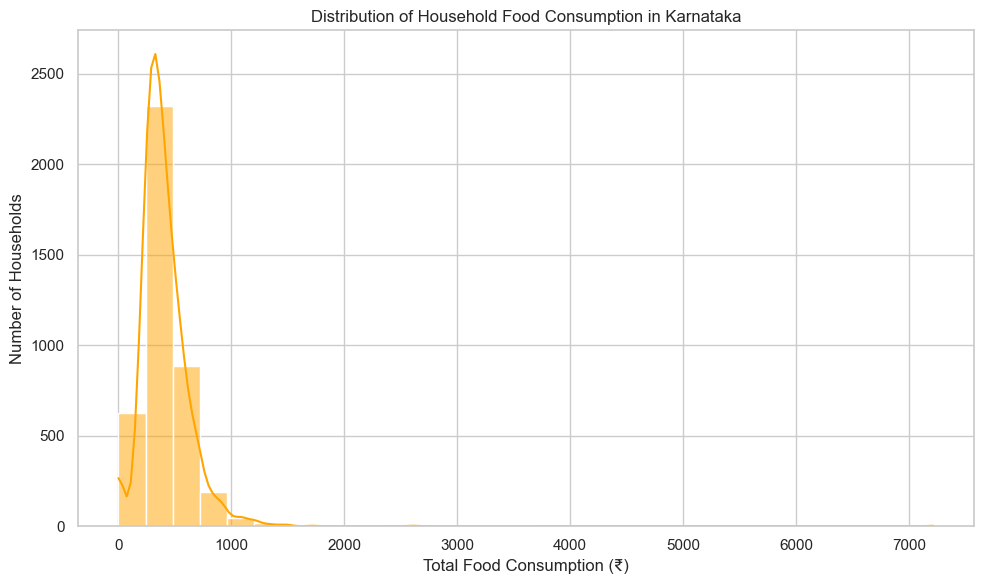

C:\Users\sharo\AppData\Local\Temp\ipykernel_18804\3852418455.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


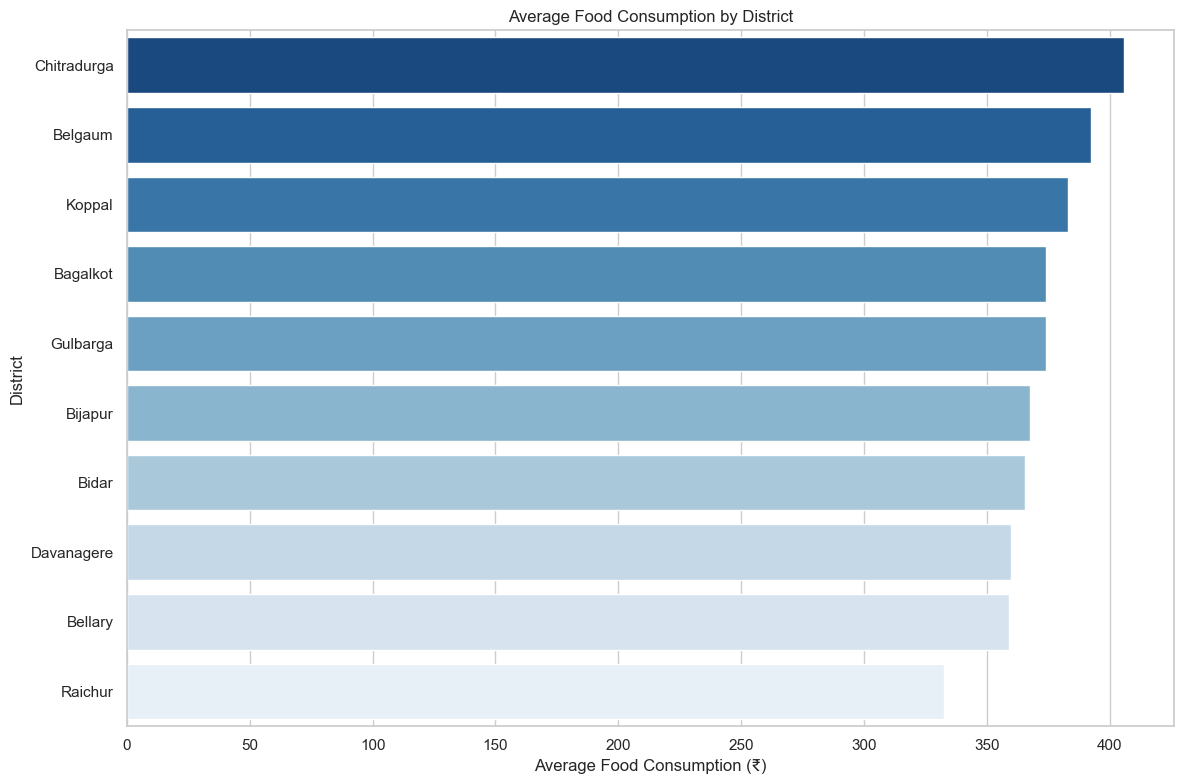

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


df = pd.read_csv("C:\\vcu extra\\assignment\\data\\NSSO68.csv") 


df_kar = df[df['state'] == 29].copy()


df_kar.rename(columns={
    'District': 'district_code',
    'MPCE_URP': 'mpce_urp',
    'MPCE_MRP': 'mpce_mrp',
    'cerealtot_v': 'cereal',
    'pulsestot_v': 'pulses',
    'Milktotal_v': 'milk',
    'nonvegtotal_v': 'nonveg',
    'vegtt_v': 'veg'
}, inplace=True)


df_kar['total_food_consumption'] = df_kar[['cereal', 'pulses', 'milk', 'nonveg', 'veg']].sum(axis=1)


district_map = {
    1: "Belgaum", 2: "Bagalkot", 3: "Bijapur", 4: "Bidar", 5: "Raichur",
    6: "Gulbarga", 7: "Koppal", 8: "Bellary", 9: "Chitradurga", 10: "Davanagere",
    # Add full district mappings here if needed
}
df_kar['district_name'] = df_kar['district_code'].map(district_map)


district_summary = df_kar.groupby('district_name', dropna=False).agg(
    avg_mpce_urp=('mpce_urp', 'mean'),
    avg_food_consumption=('total_food_consumption', 'mean')
).reset_index()


plt.figure(figsize=(10,6))
sns.histplot(df_kar['total_food_consumption'], bins=30, color='orange', kde=True)
plt.title('Distribution of Household Food Consumption in Karnataka')
plt.xlabel('Total Food Consumption (₹)')
plt.ylabel('Number of Households')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12,8))
sns.barplot(
    data=district_summary.sort_values('avg_food_consumption', ascending=False),
    y='district_name', x='avg_food_consumption', palette='Blues_r'
)
plt.title('Average Food Consumption by District')
plt.xlabel('Average Food Consumption (₹)')
plt.ylabel('District')
plt.tight_layout()
plt.show()
